In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

In [ ]:
dataset = files.upload()



Saving data.csv to data (3).csv


In [ ]:
dataset=pd.read_csv('data.csv')

In [ ]:
# DATA PREPROCESSING 
#*******************
#*******************
X = dataset.iloc[:, 2:32]
y = dataset.iloc[:, 1]

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# MAKING THE ARTIFICIAL NEURAL NETWORK
# ************************************
# ************************************

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 8, epochs = 108)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Epoch 1/108
455/455 [==============================] - 1s 1ms/step - loss: 0.6751 - acc: 0.8769
Epoch 2/108
455/455 [==============================] - 0s 145us/step - loss: 0.5865 - acc: 0.9495
Epoch 3/108
455/455 [==============================] - 0s 164us/step - loss: 0.4026 - acc: 0.9582
Epoch 4/108
455/455 [==============================] - 0s 152us/step - loss: 0.2367 - acc: 0.9648
Epoch 5/108
455/455 [==============================] - 0s 154us/step - loss: 0.1522 - acc: 0.9692
Epoch 6/108
455/455 [==============================] - 0s 148us/step - loss: 0.1144 - acc: 0.9692
Epoch 7/108
455/455 [==============================] - 0s 149us/step - loss: 0.0941 - acc: 0.9714
Epoch 8/108
455/455 [==============================] - 0s 157us/step - loss: 0.0805 - acc: 0.9736
Epoch 9/108
455/455 [==============================] - 0s 157us/step - loss: 0.0700 - acc: 0.9802
Epoch 10/108
455/455 [==============================] - 0s 151us/step - loss: 0.0628 - acc: 0.9824
Epoch 11/108
455/455 

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# CONFUSION_MATRIX_CALL(CHECKING THE CORRECT PREDICTIONS)
cm

array([[74,  1],
       [ 3, 36]])

In [ ]:
X_test

array([[-0.83324375,  0.12287913, -0.87061379, ..., -1.35466845,
        -0.57274292, -0.44781347],
       [-0.79088587, -2.03496685, -0.78717958, ..., -0.412373  ,
         0.15893818,  0.08245286],
       [-0.50567614, -1.02429981, -0.5716412 , ..., -1.16700922,
        -0.02438061, -0.93146298],
       ...,
       [ 1.13216192, -0.14774972,  1.13344324, ...,  0.24781833,
         0.16690857, -0.22987983],
       [-0.09339277, -0.7560659 , -0.17246576, ..., -1.09240699,
        -0.59665407, -1.02469662],
       [-0.47178984, -0.29863129, -0.53851291, ..., -1.53878985,
        -1.0892237 , -1.66684331]])

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [

In [ ]:
# SAVING THE ARTIFICIAL NEURAL NETWORK CALLS
from keras.models import load_model
model = classifier.save('breast_cancer_model.h5')  # creates a HDF5 file 'my_model.h5'




In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0])

In [ ]:
from google.colab import files
files.download( "breast_cancer_model.h5" ) 


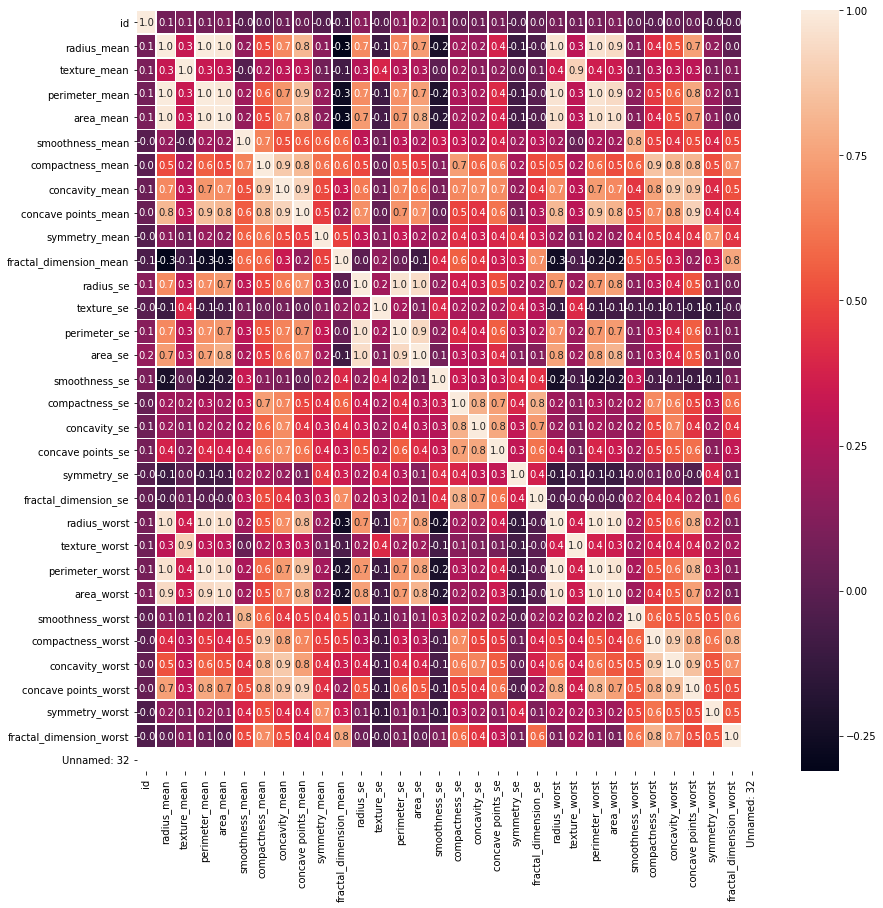

In [ ]:
# VISUALIZING THE BREAST_CANCER DATASET
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


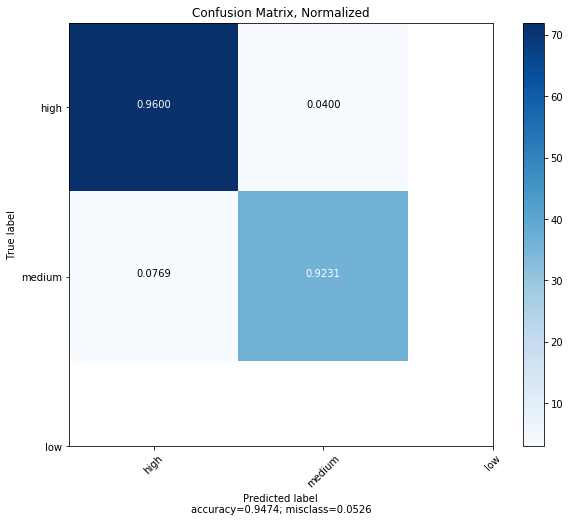

In [ ]:
# VISUALIZING AND PLOTTING THE ARTIFICIAL NEURAL NETWORK RESULTS
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(9, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

plot_confusion_matrix(cm,
                      normalize    = True,
                      target_names = ['high', 'medium', 'low'],
                      title        = "Confusion Matrix, Normalized")

 

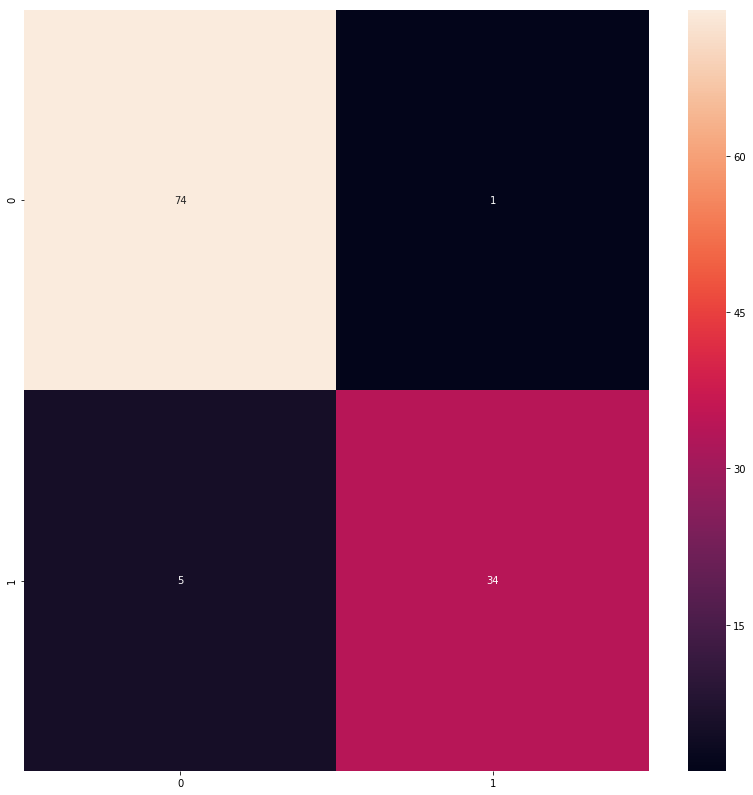

In [ ]:
# VISUALIZING_PREDICTION_RESULTS
# CONFUSION MATRIX
import seaborn as sns

f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(cm,annot=True,fmt="d")


In [ ]:
# CITATIONS
# *********

@article{scikit-learn,
 title={Scikit-learn: Machine Learning in {P}ython},
 author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.
         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.
         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and
         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},
 journal={Journal of Machine Learning Research},
 volume={12},
 pages={2825--2830},
 year={2011}
}


_@misc{chollet2015keras,
  title={Keras},
  author={Chollet, Fran\c{c}ois and others},
  year={2015},
  howpublished={\url{https://keras.io}},
}

